## Practice Exercise (SVR) 

In [96]:
from pathlib import Path
import sys

current_root = Path.cwd()
project_root = current_root.parent.absolute()

sys.path.insert(0,str(project_root))

from config import EXPERIENCE_SALARY

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
#loadin gthe dataset
df = pd.read_csv(EXPERIENCE_SALARY)
print(f'Shape of the DataSet: {df.shape}\n')
print(f'\nMissing Values in each columns:\n {df.isnull().sum()}')

Shape of the DataSet: (15, 2)


Missing Values in each columns:
 Years_Experience    0
Salary_Lakhs        0
dtype: int64


In [99]:
#Defining target and feature variable
X = df[['Years_Experience']].values
y = df['Salary_Lakhs'].values

y_reshape = y.reshape(-1,1)
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_X = sc_X.fit_transform(X)
scaled_y = sc_y.fit_transform(y_reshape)

In [100]:
# training the model
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=100,epsilon=0.05)
svr.fit(scaled_X,scaled_y.ravel())

X_line = np.linspace(X.min(), X.max(),100).reshape(-1,1)
X_line_scaled = sc_X.transform(X_line)

y_pred_scaled = svr.predict(X_line_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))


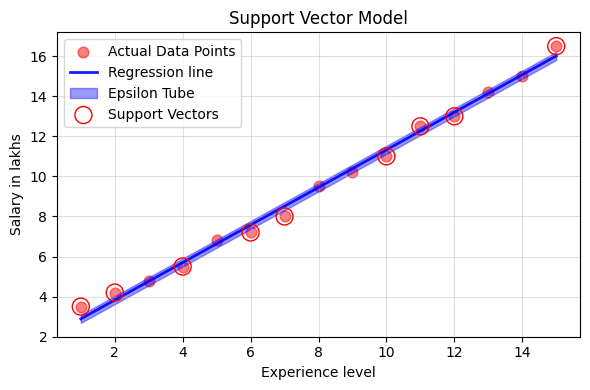

In [105]:
#visualize the results
plt.figure(figsize=(6,4))

plt.scatter(X,y,label='Actual Data Points',color='r',s=60,alpha=0.5)
plt.plot(X_line,y_pred,label='Regression line',color='blue',alpha=0.9,linewidth=2)

original_epsilon = svr.epsilon * sc_y.scale_[0]

upper_y = y_pred + original_epsilon
lower_y = y_pred - original_epsilon

plt.fill_between(X_line.ravel(),lower_y.ravel(),upper_y.ravel(),color='blue',alpha=0.4,label='Epsilon Tube')

#supporting vectors
sv = svr.support_

sv_X = X[sv]
sv_y = y[sv]
plt.scatter(sv_X,sv_y,facecolors='none',edgecolor='r',s=150,zorder=6,label='Support Vectors')

plt.ylabel('Salary in lakhs')
plt.xlabel('Experience level')
plt.title('Support Vector Model')
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

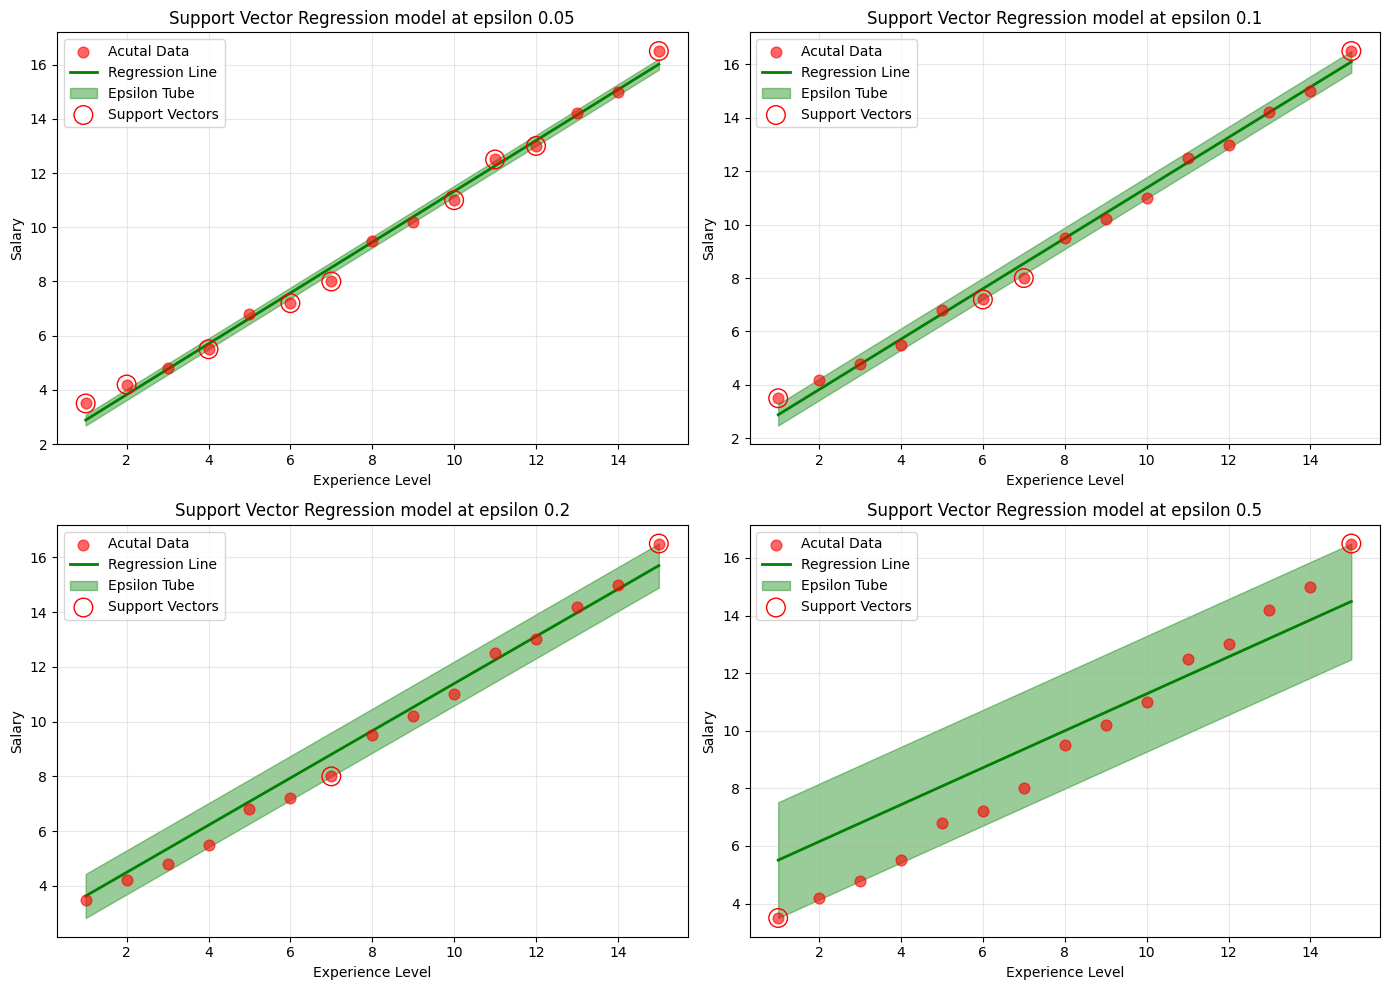

In [103]:
#different epsilons 
epsilons = [0.05, 0.1, 0.2 , 0.5]

fig, axes = plt.subplots(2,2,figsize=(14,10))
axes = axes.ravel()

for i , eps in enumerate(epsilons):
    #train the model
    svr_t = SVR(kernel='linear',C=100, epsilon=eps)
    svr_t.fit(scaled_X,scaled_y.ravel())

    pred_y_t_scaled = svr_t.predict(X_line_scaled)
    pred_y_t = sc_y.inverse_transform(pred_y_t_scaled.reshape(-1,1))

    original_epsilon_t = svr_t.epsilon * sc_y.scale_[0]

    y_up = pred_y_t + original_epsilon_t 
    y_low = pred_y_t - original_epsilon_t

    #support Vectors
    sv_t = svr_t.support_
    X_sv_t = X[sv_t]
    y_sv_t = y[sv_t]

    axes[i].scatter(X,y,label='Acutal Data',color='r',s=60,alpha=0.6,zorder=5)
    axes[i].plot(X_line,pred_y_t,label='Regression Line',color='green',linewidth=2)
    axes[i].fill_between(X_line.ravel(),y_up.ravel(),y_low.ravel(),label='Epsilon Tube',color='green',alpha=0.4)
    axes[i].scatter([X_sv_t],[y_sv_t],label='Support Vectors',facecolor='none',edgecolor='r',zorder=6,s=180)
    axes[i].set_ylabel('Salary')
    axes[i].set_xlabel('Experience Level')
    axes[i].set_title(f'Support Vector Regression model at epsilon {eps}')
    axes[i].legend()
    axes[i].grid(True,alpha=0.3)
plt.tight_layout()
plt.show()